In [1]:
# Importing the Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [11]:
# Loading the dataset

data = pd.read_csv(r"C:\Users\Shashi\Model Building\Ensemble Models\Diabeted_Ensemble.csv")

In [14]:
# Importing warnings
import warnings
warnings.filterwarnings('ignore')

In [15]:
# Checking the Head of data

data.head()

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function,Age (years),Class variable
0,6,148,72,35,0,33.6,0.627,50,YES
1,1,85,66,29,0,26.6,0.351,31,NO
2,8,183,64,0,0,23.3,0.672,32,YES
3,1,89,66,23,94,28.1,0.167,21,NO
4,0,137,40,35,168,43.1,2.288,33,YES


In [16]:
# Checking the Missing Values

data.isna().sum()

 Number of times pregnant        0
 Plasma glucose concentration    0
 Diastolic blood pressure        0
 Triceps skin fold thickness     0
 2-Hour serum insulin            0
 Body mass index                 0
 Diabetes pedigree function      0
 Age (years)                     0
 Class variable                  0
dtype: int64

In [17]:
# Checking the duplicates

data.duplicated().sum()

0

In [18]:
# Renaming the Column names

data.columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

In [19]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,YES
1,1,85,66,29,0,26.6,0.351,31,NO
2,8,183,64,0,0,23.3,0.672,32,YES
3,1,89,66,23,94,28.1,0.167,21,NO
4,0,137,40,35,168,43.1,2.288,33,YES
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,NO
764,2,122,70,27,0,36.8,0.340,27,NO
765,5,121,72,23,112,26.2,0.245,30,NO
766,1,126,60,0,0,30.1,0.349,47,YES


In [20]:
# Checking the zero Variance 

data.var() == 0

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
dtype: bool

In [361]:
# Encoder - LabelEncoder

from sklearn.preprocessing import LabelEncoder

In [362]:
enc = LabelEncoder()

data['Outcome'] = enc.fit_transform(data['Outcome'])

In [421]:
# Standardization - Scaling Min = 0, Max = 1

def norm_fun(i):
    x = (i - i.min())/(i.max() - i.min())
    
    return x

In [422]:
data_norm = norm_fun(data)
data = pd.DataFrame(data_norm)
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.226180,0.607510,0.566438,0.207439,0.094326,0.476790,0.168179,0.204015,0.348958
std,0.198210,0.160666,0.158654,0.161134,0.136222,0.117499,0.141473,0.196004,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.058824,0.497487,0.508197,0.000000,0.000000,0.406855,0.070773,0.050000,0.000000
50%,0.176471,0.587940,0.590164,0.232323,0.036052,0.476900,0.125747,0.133333,0.000000
75%,0.352941,0.704774,0.655738,0.323232,0.150414,0.545455,0.234095,0.333333,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [423]:
# Checking the data Correlation

data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<AxesSubplot:>

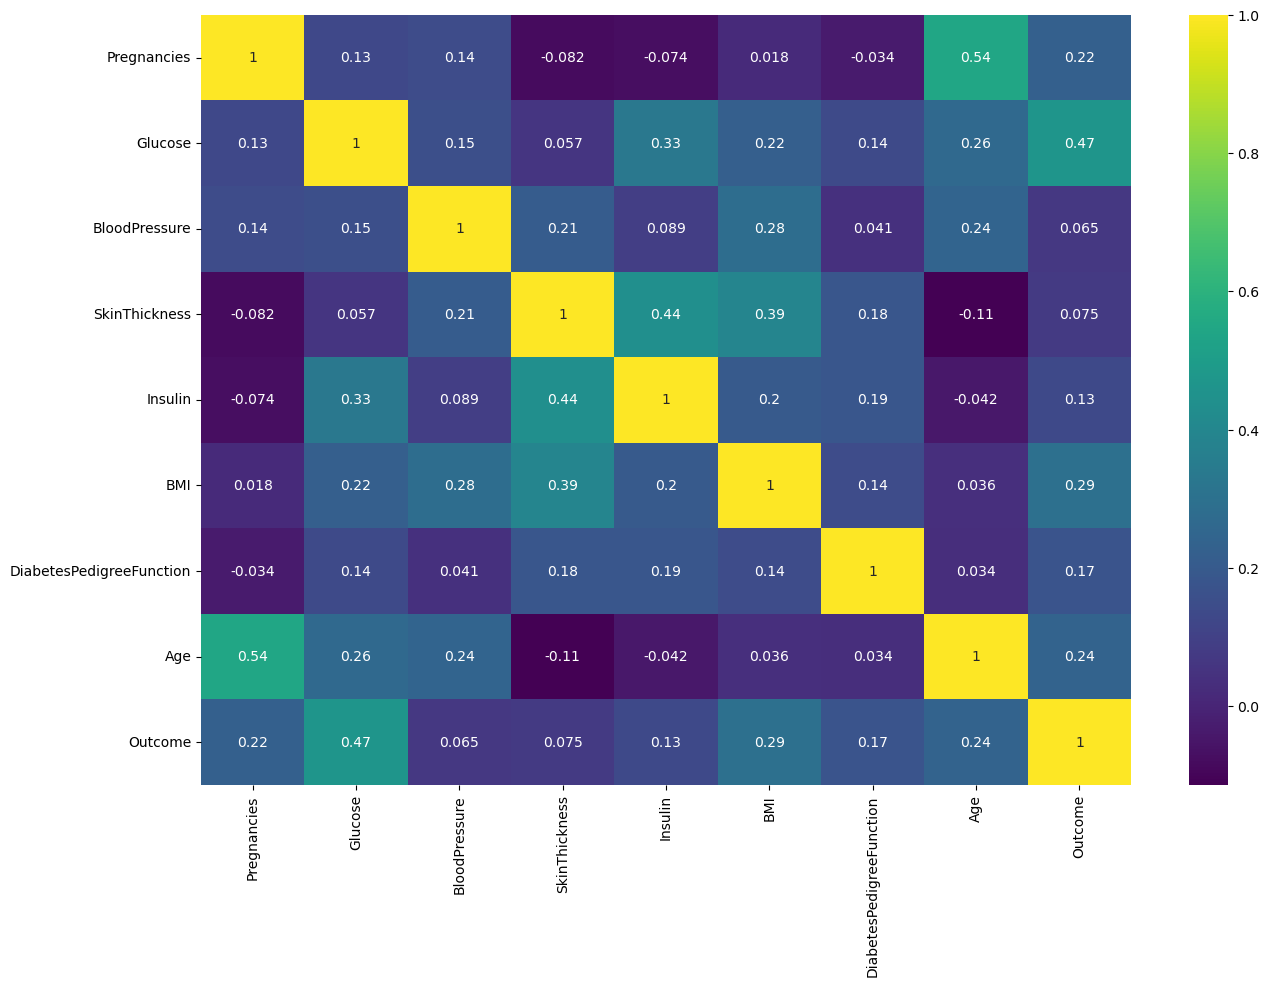

In [424]:
# Heat map

fig = plt.figure(figsize = (15,10))
sns.heatmap(data.corr(), cmap='viridis', annot = True) 

In [425]:
# Spliting the data

X = data.drop('Outcome', axis = 1)
Y = data.Outcome

In [426]:
# Importing the Train Test Split

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [427]:
# Bagging

from sklearn import tree
clftree = tree.DecisionTreeClassifier()
from sklearn.ensemble import BaggingClassifier


bag_clf = BaggingClassifier(base_estimator = clftree, n_estimators = 1000,
                            bootstrap = True, n_jobs = 1, random_state = 42)

bag_clf.fit(x_train, y_train)

from sklearn.metrics import accuracy_score, confusion_matrix

# Evaluation on Testing Data
confusion_matrix(y_test, bag_clf.predict(x_test))
accuracy_score(y_test, bag_clf.predict(x_test))

# Evaluation on Training Data
confusion_matrix(y_train, bag_clf.predict(x_train))
accuracy_score(y_train, bag_clf.predict(x_train))

1.0

In [428]:
# Ada Boosting

from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(learning_rate = 0.02, n_estimators = 5000)

ada_clf.fit(x_train, y_train)

from sklearn.metrics import accuracy_score, confusion_matrix

# Evaluation on Testing Data
confusion_matrix(y_test, ada_clf.predict(x_test))
accuracy_score(y_test, ada_clf.predict(x_test))

# Evaluation on Training Data
accuracy_score(y_train, ada_clf.predict(x_train))


0.8420195439739414

In [429]:
# Ada Boosting - model 2

from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(learning_rate = 0.5, n_estimators=5000, random_state=0)

ada_clf.fit(x_train, y_train)

from sklearn.metrics import accuracy_score, confusion_matrix

# Evaluation on Testing Data
confusion_matrix(y_test, ada_clf.predict(x_test))
accuracy_score(y_test, ada_clf.predict(x_test))

# Evaluation on Training Data
accuracy_score(y_train, ada_clf.predict(x_train))

0.993485342019544

In [430]:
# Gradient Boosting

from sklearn.ensemble import GradientBoostingClassifier

boost_clf = GradientBoostingClassifier()

boost_clf.fit(x_train, y_train)

from sklearn.metrics import accuracy_score, confusion_matrix

confusion_matrix(y_test, boost_clf.predict(x_test))
accuracy_score(y_test, boost_clf.predict(x_test))

0.8116883116883117

In [431]:
# Hyperparameters

from sklearn.ensemble import GradientBoostingClassifier

boost_clf2 = GradientBoostingClassifier(n_estimators=200, learning_rate= 1, max_depth=1, random_state=0)

boost_clf2.fit(x_train, y_train)

from sklearn.metrics import accuracy_score, confusion_matrix

confusion_matrix(y_test, boost_clf2.predict(x_test))
accuracy_score(y_test, boost_clf2.predict(x_test))

0.8376623376623377

In [432]:
boost_clf3 = GradientBoostingClassifier(learning_rate = 0.2, n_estimators = 5000, max_depth = 1)
boost_clf3.fit(x_train, y_train)

from sklearn.metrics import accuracy_score, confusion_matrix

# Evaluation on Testing Data
confusion_matrix(y_test, boost_clf3.predict(x_test))
accuracy_score(y_test, boost_clf3.predict(x_test))

# Evaluation on Training Data
accuracy_score(y_train, boost_clf3.predict(x_train))

0.9348534201954397

In [433]:
Y

0      1.0
1      0.0
2      1.0
3      0.0
4      1.0
      ... 
763    0.0
764    0.0
765    0.0
766    1.0
767    0.0
Name: Outcome, Length: 768, dtype: float64

In [434]:
import xgboost as xgb

xgb_clf = xgb.XGBClassifier(max_depths = 5, n_estimators = 10000, learning_rate = 0.3, n_jobs = -1)

# n_jobs – Number of parallel threads used to run xgboost.
# learning_rate (float) – Boosting learning rate (xgb’s “eta”)


xgb_clf.fit(x_train, y_train)

[18:05:12] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "max_depths" } are not used.



XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.3, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=6, max_depths=5, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=10000,
              n_jobs=-1, num_parallel_tree=1, predictor='auto', ...)

In [435]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Evaluation on Testing Data
confusion_matrix(y_test, xgb_clf.predict(x_test))
accuracy_score(y_test, xgb_clf.predict(x_test))


0.7727272727272727

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

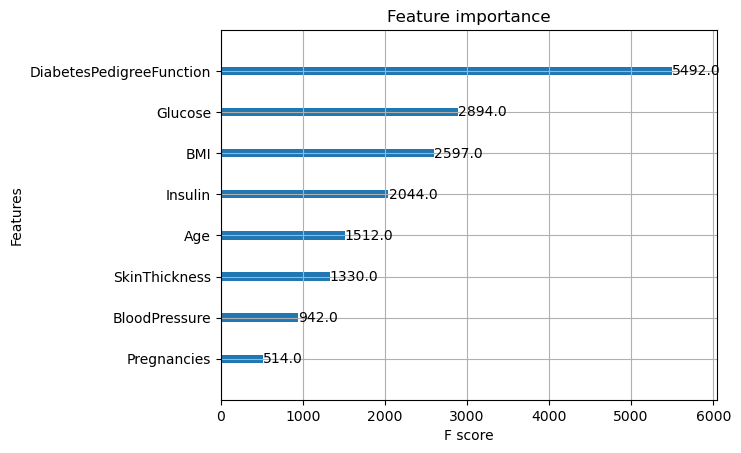

In [436]:
xgb.plot_importance(xgb_clf)

In [437]:
# GridsearchCV
xgb_clf = xgb.XGBClassifier(n_estimators = 500, learning_rate = 0.1, random_state = 42)

param_test1 = {'max_depth': range(3,10,2), 'gamma': [0.1, 0.2, 0.3],
               'subsample': [0.8, 0.9], 'colsample_bytree': [0.8, 0,9],
               'reg_alpha': [1e-2, 0.1, 1]}

# Grid Search
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(xgb_clf, param_test1, n_jobs = -1, cv = 5, scoring = 'accuracy')

grid_search.fit(x_train, y_train)

grid_search.best_params_
cv_xg_clf = grid_search.best_estimator_

# Evaluation on Testing Data with model with hyperparameter
accuracy_score(y_test, cv_xg_clf.predict(x_test))



0.7922077922077922

In [438]:
### k-Nearest Neighbors (k-NN) with GridSearchCV
knn = neighbors.KNeighborsClassifier()

params_knn = {'n_neighbors': np.arange(1, 25)}

knn_gs = GridSearchCV(knn, params_knn, cv = 5)

knn_gs.fit(x_train, y_train)
knn_best = knn_gs.best_estimator_
knn_best

KNeighborsClassifier(n_neighbors=24)

In [439]:
### Random Forest Classifier with GridSearchCV

from sklearn import datasets, linear_model, svm, neighbors, naive_bayes, ensemble

rf = ensemble.RandomForestClassifier(random_state = 0)

params_rf = {'n_estimators': [50, 100, 200]}

rf_gs = GridSearchCV(rf, params_rf, cv = 5)

rf_gs.fit(x_train, y_train)
rf_best = rf_gs.best_estimator_

In [440]:
### Logistic Regression with GridSearchCV
log_reg = linear_model.LogisticRegression(random_state = 123, solver = "liblinear", 
                                          penalty = "l2", max_iter = 5000)
C = np.logspace(1, 4, 10)
params_lr = dict(C = C)

lr_gs = GridSearchCV(log_reg, params_lr, cv = 5, verbose = 0)

lr_gs.fit(x_train, y_train)
lr_best = lr_gs.best_estimator_

In [441]:
# Combine all three Voting Ensembles

from sklearn.ensemble import VotingClassifier

estimators = [('knn', knn_best), ('rf', rf_best), ('log_reg', lr_best)]

# Instantiate the voting classifier
ensemble_H = VotingClassifier(estimators, voting = "hard")

# Fit classifier with the training data
hard_voting = ensemble_H.fit(x_train, y_train)

In [442]:
# Save the voting classifier

import pickle

pickle.dump(hard_voting, open('hard_voting.pkl', 'wb'))

# Loading a saved model
model = pickle.load(open('hard_voting.pkl', 'rb'))
model

VotingClassifier(estimators=[('knn', KNeighborsClassifier(n_neighbors=24)),
                             ('rf',
                              RandomForestClassifier(n_estimators=200,
                                                     random_state=0)),
                             ('log_reg',
                              LogisticRegression(C=100.0, max_iter=5000,
                                                 random_state=123,
                                                 solver='liblinear'))])

In [446]:
print("knn_gs.score: ", knn_best.score(x_test, y_test))
# Output: knn_gs.score:

print("rf_gs.score: ", rf_best.score(x_test, y_test))
# Output: rf_gs.score:

print("log_reg.score: ", lr_best.score(x_test, y_test))
# Output: log_reg.score:

knn_gs.score:  0.7987012987012987
rf_gs.score:  0.8051948051948052
log_reg.score:  0.8246753246753247


In [447]:
print("ensemble.score: ", ensemble_H.score(x_test, y_test))
# Output: ensemble.score:

ensemble.score:  0.8376623376623377


In [448]:
# Soft Voting

# Combine all 3 models using VotingClassifier with voting = "soft" parameter
estimators = [('knn', knn_best), ('rf', rf_best), ('log_reg', lr_best)]

ensemble_S = VotingClassifier(estimators, voting = "soft")

soft_voting = ensemble_S.fit(x_train, y_train)

In [449]:
# Soft Voting

# Save model
pickle.dump(soft_voting, open('soft_voting.pkl', 'wb'))


# Load the saved model
model = pickle.load(open('soft_voting.pkl', 'rb'))
model

VotingClassifier(estimators=[('knn', KNeighborsClassifier(n_neighbors=24)),
                             ('rf',
                              RandomForestClassifier(n_estimators=200,
                                                     random_state=0)),
                             ('log_reg',
                              LogisticRegression(C=100.0, max_iter=5000,
                                                 random_state=123,
                                                 solver='liblinear'))],
                 voting='soft')

In [450]:
print("knn_gs.score: ", knn_gs.score(x_test, y_test))
# Output: knn_gs.score:

print("rf_gs.score: ", rf_gs.score(x_test, y_test))
# Output: rf_gs.score:

print("log_reg.score: ", lr_gs.score(x_test, y_test))
# Output: log_reg.score:

knn_gs.score:  0.7987012987012987
rf_gs.score:  0.8051948051948052
log_reg.score:  0.8246753246753247


In [451]:
print("ensemble.score: ", ensemble_S.score(x_test, y_test))
# Output: ensemble.score: AVG or WT.AVG

ensemble.score:  0.8246753246753247


In [452]:
# Import Libraries

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [453]:
# Stacking

# Base estimators

estimators = [('rf', RandomForestClassifier(n_estimators = 10, random_state = 42)),
              ('svr', make_pipeline(StandardScaler(), LinearSVC(random_state = 42)))]

In [454]:
# Meta Model stacked on top of base estimators

clf = StackingClassifier(estimators = estimators, final_estimator = LogisticRegression())

In [455]:
# Fit the model on traing data

stacking = clf.fit(x_train, y_train)

In [456]:
# Accuracy

stacking.score(x_test, y_test)

0.8181818181818182

In [457]:
# Save the Stacking model 
pickle.dump(stacking, open('stacking_iris.pkl', 'wb'))

In [458]:
# Load the saved model

model = pickle.load(open('stacking_iris.pkl', 'rb'))
model

StackingClassifier(estimators=[('rf',
                                RandomForestClassifier(n_estimators=10,
                                                       random_state=42)),
                               ('svr',
                                Pipeline(steps=[('standardscaler',
                                                 StandardScaler()),
                                                ('linearsvc',
                                                 LinearSVC(random_state=42))]))],
                   final_estimator=LogisticRegression())

In [459]:
pred = model.predict(x_test)

In [460]:
pred

array([1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0.])

In [461]:
y_test

661    1.0
122    0.0
113    0.0
14     1.0
529    0.0
      ... 
476    1.0
482    0.0
230    1.0
527    0.0
380    0.0
Name: Outcome, Length: 154, dtype: float64